In [1]:
using CSV, DataFrames
using Pkg
using Distributions, KernelDensity
using StatsPlots, Plots

In [2]:
using StatsBase

# Preprocessing dataset


In [6]:
# read csv files 
df = CSV.read("/home/felipe/Documents/USP/8semestre/Projeto_microbiota/RAW/abundance_stoolsubset.csv", DataFrame)

# view 10 rowns of all columns
first(df, 5)

,dataset_name,Candela_Africa,Candela_Africa_1,Candela_Africa_2,Candela_Africa_3
,String,String15,String15,String15,String15
1,sampleID,H10,H11,H12,H13
2,subjectID,h10,h11,h12,h13
3,bodysite,stool,stool,stool,stool
4,disease,n,n,n,n
5,age,40,29,8,34


In [10]:
function read_csv(path)
    
    #=
        Function to read and process csv file. 
    
        Parameters:
        path: String. CSV file + path
    
        Return:
        df: DataFrame. DataFrame object processed
    
    =#
    
    df = CSV.read(path, DataFrame)
    
    # get colnames
    colnames = names(df)
    # create new columns
    df[!, :id] = 1:size(df, 1)

    df1 = stack(df, colnames)
    df = unstack(df1, :variable, :id, :value)
    
    # rename columns names
    rename!(df, Symbol.(Vector(df[1,:])))[2:end,:]
    
    # delete row by index
    delete!(df, [1])
    
    df
end

read_csv (generic function with 1 method)

In [11]:
df = read_csv("/home/felipe/Documents/USP/8semestre/Projeto_microbiota/RAW/abundance_stoolsubset.csv")

first(df, 5)

,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country
,String,String?,String?,String?,String?,String?,String?,String?
1,Candela_Africa,H10,h10,stool,n,40,female,tanzania
2,Candela_Africa_1,H11,h11,stool,n,29,female,tanzania
3,Candela_Africa_2,H12,h12,stool,n,8,female,tanzania
4,Candela_Africa_3,H13,h13,stool,n,34,male,tanzania
5,Candela_Africa_4,H14,h14,stool,n,30,male,tanzania


In [12]:
unique(df.gender)

6-element Vector{Union{Missing, String}}:
 "female"
 "male"
 "-"
 "nd"
 "na"
 " -"

In [13]:
# remove missing values
df = df[(df.gender .!= "-") .& (df.gender .!= " -") .& (df.gender .!= "na") .& (df.gender .!= "nd"), :]
first(df, 5)

,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country
,String,String?,String?,String?,String?,String?,String?,String?
1,Candela_Africa,H10,h10,stool,n,40,female,tanzania
2,Candela_Africa_1,H11,h11,stool,n,29,female,tanzania
3,Candela_Africa_2,H12,h12,stool,n,8,female,tanzania
4,Candela_Africa_3,H13,h13,stool,n,34,male,tanzania
5,Candela_Africa_4,H14,h14,stool,n,30,male,tanzania


In [14]:
unique(df.disease)

13-element Vector{Union{Missing, String}}:
 "n"
 "ibd_ulcerative_colitis"
 "ibd_crohn_disease"
 "n_relative"
 "cirrhosis"
 "obese"
 "overweight"
 "-"
 "underweight"
 "t2d"
 "cancer"
 "small_adenoma"
 "large_adenoma"

In [16]:
df = df[(df.disease .!= "-"),:]
first(df, 5)

,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country
,String,String?,String?,String?,String?,String?,String?,String?
1,Candela_Africa,H10,h10,stool,n,40,female,tanzania
2,Candela_Africa_1,H11,h11,stool,n,29,female,tanzania
3,Candela_Africa_2,H12,h12,stool,n,8,female,tanzania
4,Candela_Africa_3,H13,h13,stool,n,34,male,tanzania
5,Candela_Africa_4,H14,h14,stool,n,30,male,tanzania


In [17]:
# count values by condition
length(findall(df.disease .== "n"))

875

In [18]:
# select rows by condition
df = df[(df.age .!= "-") .& (df.age .!= " -") .& (df.age .!= "na") .& (df.age .!= "nd"), :]
first(df, 5)

,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country
,String,String?,String?,String?,String?,String?,String?,String?
1,Candela_Africa,H10,h10,stool,n,40,female,tanzania
2,Candela_Africa_1,H11,h11,stool,n,29,female,tanzania
3,Candela_Africa_2,H12,h12,stool,n,8,female,tanzania
4,Candela_Africa_3,H13,h13,stool,n,34,male,tanzania
5,Candela_Africa_4,H14,h14,stool,n,30,male,tanzania


In [19]:
last(df, 5)

,dataset_name,sampleID,subjectID,bodysite,disease
,String,String?,String?,String?,String?
1,Zeller_fecal_colorectal_cancer_129,CCIS95409808ST-4-0,fr-152,stool,n
2,Zeller_fecal_colorectal_cancer_130,CCIS96387239ST-4-0,fr-626,stool,small_adenoma
3,Zeller_fecal_colorectal_cancer_131,CCIS98482370ST-3-0,fr-052,stool,n
4,Zeller_fecal_colorectal_cancer_132,CCIS98512455ST-4-0,fr-459,stool,cancer
5,Zeller_fecal_colorectal_cancer_133,CCIS98832363ST-4-0,fr-552,stool,cancer


In [20]:
# change data type with missing values 
df.age = passmissing(parse).(Float64, df.age)

1288-element Vector{Float64}:
 40.0
 29.0
  8.0
 34.0
 30.0
 16.0
 21.0
 23.0
 17.0
 15.0
 43.0
 13.0
 43.0
  ⋮
 78.0
 63.0
 63.0
 65.0
 59.0
 64.0
 52.0
 63.0
 66.0
 53.0
 63.0
 55.0

In [21]:
first(df, 5)

,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country
,String,String?,String?,String?,String?,Float64,String?,String?
1,Candela_Africa,H10,h10,stool,n,40.0,female,tanzania
2,Candela_Africa_1,H11,h11,stool,n,29.0,female,tanzania
3,Candela_Africa_2,H12,h12,stool,n,8.0,female,tanzania
4,Candela_Africa_3,H13,h13,stool,n,34.0,male,tanzania
5,Candela_Africa_4,H14,h14,stool,n,30.0,male,tanzania


# Exploratory analysis

In [19]:
hist = Plots.Plot[]
for disease in unique(df.disease)
    push!(hist, histogram(df.age[df.disease .== disease], label = false, title = "Age distribution of "*disease,
            titlefontsize = 6, xtickfontsize = 6, ytickfontsize = 6, ylabelfontsize = 6, xlabelfontsize = 6))
    xlabel!("age")
    ylabel!("count")
    
end

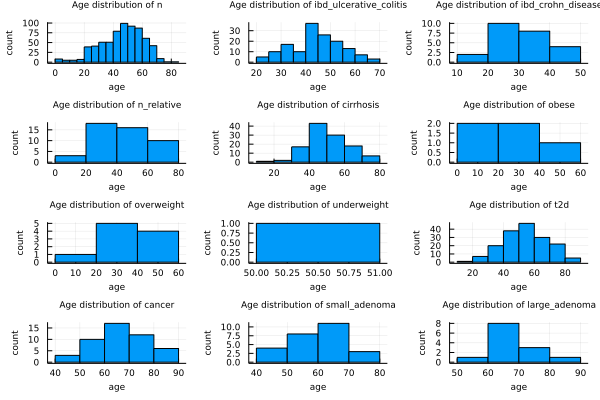

In [20]:
plot(hist[1], hist[2], hist[3], hist[4], hist[5], hist[6], hist[7], hist[8], hist[9], hist[10], hist[11],hist[12], layout = (4, 3))

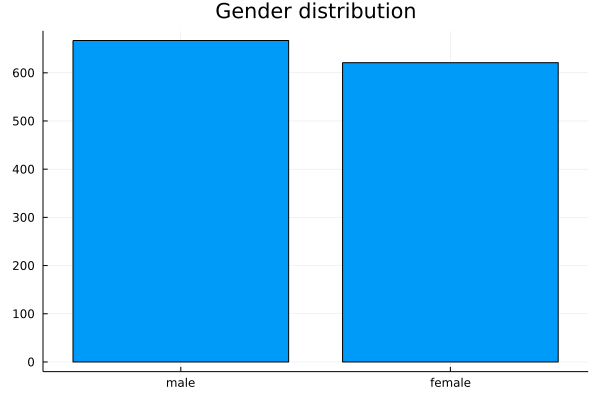

In [21]:
plot(countmap(df.gender), seriestype = :bar, label = false, title = "Gender distribution")

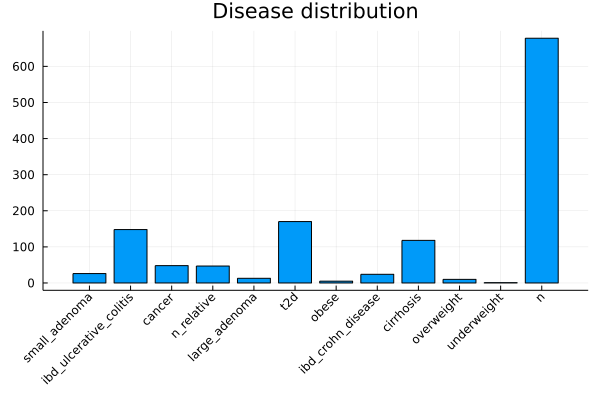

In [22]:
plot(countmap(df.disease), seriestype = :bar, label = false, title = "Disease distribution", xrotation = 45)

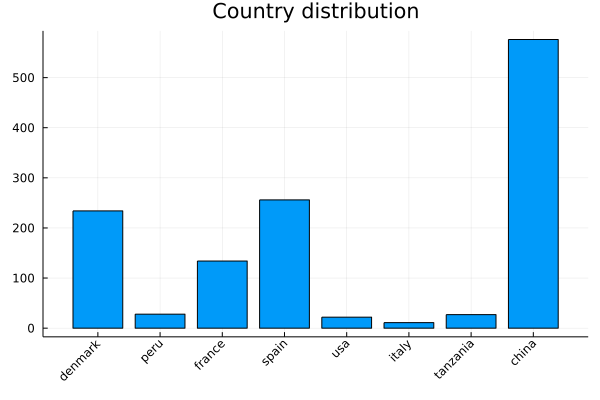

In [23]:
plot(countmap(df.country), seriestype = :bar, label = false, title = "Country distribution", xrotation = 45)

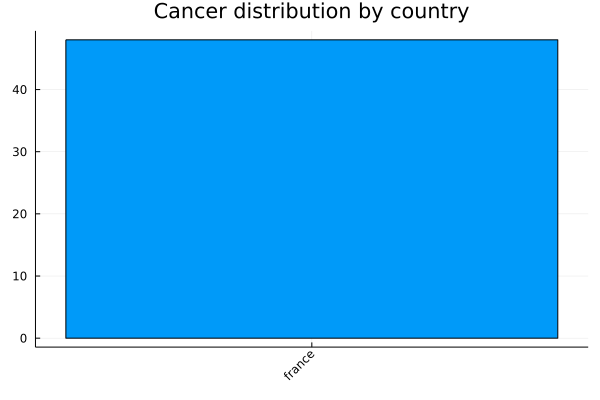

In [24]:
plot(countmap(df.country[df.disease .== "cancer"]), seriestype = :bar, label = false, title = "Cancer distribution by country", xrotation = 45)

In [25]:
plot(countmap(df.country[df.disease .== "ibd_ulcerative_colitis"]), seriestype = :bar, label = false, title = "IBD distribution by country", xrotation = 45)

Plots.Plot{Plots.GRBackend}

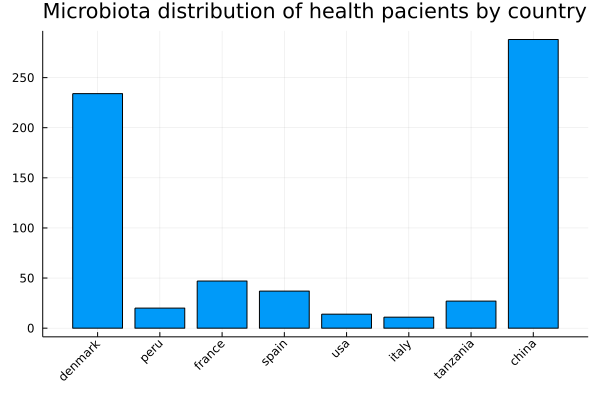

In [26]:
plot(countmap(df.country[df.disease .== "n"]), seriestype = :bar, label = false, title = "Microbiota distribution of health pacients by country", xrotation = 45)

# Regular expressions

In [203]:
# retrieve all columns with genus name
genusnames_complete = []

regex = r"k__.*\S.*\S.*\S.*\S.*\S.*g__\w*\Z"

@time begin
    for colnames in names(df)
        try 
            f = match(regex, colnames)
            f.match
            push!(genusnames_complete, f.match)
        catch
        end
    end
end

492.566831 seconds (16.13 k allocations: 2.718 MiB)


In [204]:
genusnames_complete

292-element Vector{Any}:
 "k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter"
 "k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera"
 "k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified"
 "k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces"
 "k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Varibaculum"
 "k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia"
 "k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium"
 "k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Gardnerella"
 "k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae

In [205]:
df_genus = df
first(df_genus, 5)

,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country
,String,String?,String?,String?,String?,Float64,String?,String?
1,Candela_Africa,H10,h10,stool,n,40.0,female,tanzania
2,Candela_Africa_1,H11,h11,stool,n,29.0,female,tanzania
3,Candela_Africa_2,H12,h12,stool,n,8.0,female,tanzania
4,Candela_Africa_3,H13,h13,stool,n,34.0,male,tanzania
5,Candela_Africa_4,H14,h14,stool,n,30.0,male,tanzania


In [209]:
df_genus = df_genus[:,genusnames_complete]
first(df_genus, 10)

,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter
,String?
1,0.24169
2,0.50621
3,0.30522
4,0.35994
5,0.16331
6,1.9859
7,0.09259
8,0.66628
9,0


In [264]:
# split just the genus name from bacteria complete name 
genusnames = []

regex = r"k__B.*\S.*\S.*\S.*\S.*\S.*g__"

@time begin
    for colnames in names(df_genus)
        try 
            f = split(colnames, regex)
            push!(genusnames, f[2])
        catch
        end
    end
end

  0.130827 seconds (2.05 k allocations: 99.750 KiB)


In [266]:
genusnames

Any[]

In [212]:
rename!(df_genus, Symbol.(genusnames))
first(df_genus, 10)

,Methanobrevibacter,Methanosphaera,Acidobacteriaceae_unclassified,Actinomyces
,String?,String?,String?,String?
1,0.24169,0,0,0
2,0.50621,0,0,0
3,0.30522,0,0,0
4,0.35994,0.04139,0,0
5,0.16331,0.01148,0,0.01332
6,1.9859,0,0,0
7,0.09259,0.00194,0,0
8,0.66628,0.0382,0,0.00545
9,0,0,0,0


In [213]:
# change columns type to float
df_genus = passmissing(parse).(Float64, df_genus)
first(df_genus, 10)

,Methanobrevibacter,Methanosphaera,Acidobacteriaceae_unclassified,Actinomyces
,Float64,Float64,Float64,Float64
1,0.24169,0.0,0.0,0.0
2,0.50621,0.0,0.0,0.0
3,0.30522,0.0,0.0,0.0
4,0.35994,0.04139,0.0,0.0
5,0.16331,0.01148,0.0,0.01332
6,1.9859,0.0,0.0,0.0
7,0.09259,0.00194,0.0,0.0
8,0.66628,0.0382,0.0,0.00545
9,0.0,0.0,0.0,0.0


In [226]:
# add labels to microbiota distribution
insertcols!(df_genus, 1, :disease => df.disease)

,disease,Methanobrevibacter,Methanosphaera,Acidobacteriaceae_unclassified,Actinomyces
,String?,Float64,Float64,Float64,Float64
1,n,0.24169,0.0,0.0,0.0
2,n,0.50621,0.0,0.0,0.0
3,n,0.30522,0.0,0.0,0.0
4,n,0.35994,0.04139,0.0,0.0
5,n,0.16331,0.01148,0.0,0.01332
6,n,1.9859,0.0,0.0,0.0
7,n,0.09259,0.00194,0.0,0.0
8,n,0.66628,0.0382,0.0,0.00545
9,n,0.0,0.0,0.0,0.0


In [227]:
first(df_genus, 10)

,disease,Methanobrevibacter,Methanosphaera,Acidobacteriaceae_unclassified,Actinomyces
,String?,Float64,Float64,Float64,Float64
1,n,0.24169,0.0,0.0,0.0
2,n,0.50621,0.0,0.0,0.0
3,n,0.30522,0.0,0.0,0.0
4,n,0.35994,0.04139,0.0,0.0
5,n,0.16331,0.01148,0.0,0.01332
6,n,1.9859,0.0,0.0,0.0
7,n,0.09259,0.00194,0.0,0.0
8,n,0.66628,0.0382,0.0,0.00545
9,n,0.0,0.0,0.0,0.0


In [235]:
df_ibd = df_genus[(df_genus.disease .== "ibd_ulcerative_colitis") .| (df_genus.disease .== "n"),:]
first(df_ibd , 10)

,disease,Methanobrevibacter,Methanosphaera,Acidobacteriaceae_unclassified,Actinomyces
,String?,Float64,Float64,Float64,Float64
1,n,0.24169,0.0,0.0,0.0
2,n,0.50621,0.0,0.0,0.0
3,n,0.30522,0.0,0.0,0.0
4,n,0.35994,0.04139,0.0,0.0
5,n,0.16331,0.01148,0.0,0.01332
6,n,1.9859,0.0,0.0,0.0
7,n,0.09259,0.00194,0.0,0.0
8,n,0.66628,0.0382,0.0,0.00545
9,n,0.0,0.0,0.0,0.0


In [236]:
unique(df_ibd.disease)

2-element Vector{Union{Missing, String}}:
 "n"
 "ibd_ulcerative_colitis"

# Decision Tree Classifier